
# Python数据分析常用库简介-pandas, matplotlib, seaborn

In [ ]:
!pip install pandas matplotlib seaborn

# <strong style="color:red;">pandas</strong>

### 简介

**pandas**是一个专门用于数据处理和分析的Python库，提供了高效、灵活的数据操作工具。主要功能包括：
- **数据读取和导入**：支持从CSV、Excel、SQL等格式读取数据。
- **数据清洗和处理**：支持缺失值填充、数据过滤、分组统计等操作。
- **数据操作**：可以方便地选择、筛选、修改数据，进行数据计算和聚合。
- **数据分析**：支持计算描述性统计、数据分组汇总、数据透视等功能。

pandas库的核心数据结构是**DataFrame**（用于二维数据，如表格）和**Series**（用于一维数据，如一列数据），帮助用户快速操作数据。


------------------------------ 

In [3]:
import pandas as pd

### pandas中的数据结构

在 `pandas` 中，主要有两个核心数据结构：`Series` 和 `DataFrame`。它们构成了pandas库数据操作的基础。


#### 1. Series
`Series` 是一种一维数组的数据结构，它包含数据和索引（类似于带标签的数组）。`Series` 的每个元素都有一个索引值，可以通过该索引来访问数据。

**特点**：
- 一维数据结构，类似于Python中的列表或一列数据。
- 每个数据元素都有一个对应的标签（索引），默认从 0 开始，但也可以自定义。
- 常用于表示时间序列或一组数值。

**示例**：


In [3]:
# 创建 Series
s = pd.Series([10, 20, 30, 40])
print(s)

0    10
1    20
2    30
3    40
dtype: int64


#### 2. DataFrame
`DataFrame`是pandas库中最常用的数据结构之一，用于表示二维的表格数据。可以将其看作一个Excel表格，其中**每一列代表一个变量，每一行代表一个数据记录**。`DataFrame()`函数用于创建这个数据结构。


**示例**：

In [4]:
# 创建DataFrame对象
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 32, 45, 23, 27],
    'Salary': [70000, 80000, 120000, 75000, 65000],
    'Department': ['HR', 'Engineering', 'Engineering', 'HR', 'Marketing']
}
df = pd.DataFrame(data) #在pandas中，df通常是DataFrame对象的变量名，是一个约定俗成的缩写，代表"DataFrame"
df

,Name,Age,Salary,Department
0,Alice,25,70000,HR
1,Bob,32,80000,Engineering
2,Charlie,45,120000,Engineering
3,David,23,75000,HR
4,Eve,27,65000,Marketing


#### 总结
- **Series**：一维数组，带索引，表示一列数据。
- **DataFrame**：二维表格，带行和列的索引，表示多列数据。

这两个数据结构共同构成了 `pandas` 数据操作的核心，使得数据处理和分析更加高效。


### 数据读取


- pd.`read_csv`(filename)：从CSV文件导入数据
- pd.`read_excel`(filename)：从Excel文件导入数据

```python
# 读取CSV文件
df_csv = pd.read_csv("data.csv") # 读取CSV文件，文件的路径是和本ipynb文件在同一目录下的data.csv文件(【相对路径】)

# 读取Excel文件
df_excel = pd.read_excel("C:/Users/Administrator/Desktop/data.xlsx") # 读取Excel文件，文件的路径data.xlsx的【绝对路径】
```


### 查看数据


- **查看数据**：`df.head()`分别查看前5行。

In [5]:
# 查看前5行数据
df.head()

,Name,Age,Salary,Department
0,Alice,25,70000,HR
1,Bob,32,80000,Engineering
2,Charlie,45,120000,Engineering
3,David,23,75000,HR
4,Eve,27,65000,Marketing


In [6]:
# head()函数加上参数2，可以查看前两行数据。
df.head(2)

,Name,Age,Salary,Department
0,Alice,25,70000,HR
1,Bob,32,80000,Engineering


### 数据排序

- df.`sort_values(col1)`：按照列col1排序数据，默认升序排列
- df.`sort_values(col2, ascending=False)`：按照列col1降序排列数据

In [7]:
# 按年龄排序（升序）并输出数据集
df.sort_values('Age')

,Name,Age,Salary,Department
3,David,23,75000,HR
0,Alice,25,70000,HR
4,Eve,27,65000,Marketing
1,Bob,32,80000,Engineering
2,Charlie,45,120000,Engineering


In [8]:
# 按年龄排序（降序）并输出数据集
df.sort_values('Age',ascending=False)

,Name,Age,Salary,Department
2,Charlie,45,120000,Engineering
1,Bob,32,80000,Engineering
4,Eve,27,65000,Marketing
0,Alice,25,70000,HR
3,David,23,75000,HR


### 数据筛选

In [9]:
df

,Name,Age,Salary,Department
0,Alice,25,70000,HR
1,Bob,32,80000,Engineering
2,Charlie,45,120000,Engineering
3,David,23,75000,HR
4,Eve,27,65000,Marketing


#### 列筛选

   - **方法1：通过变量名筛选**：`df[["column1", "column2"]]`。

In [10]:
# 选择特定的列
df[['Name', 'Salary']]

,Name,Salary
0,Alice,70000
1,Bob,80000
2,Charlie,120000
3,David,75000
4,Eve,65000


<strong style="color:red;">注意</strong>：`df[['col1']]`返回的是dataframe，`df['col1']`返回的是series。

In [11]:
# 选取name列，返回dataframe对象
df[['Name']]

,Name
0,Alice
1,Bob
2,Charlie
3,David
4,Eve


In [12]:
type(df[['Name']]) # 查看数据类型

pandas.core.frame.DataFrame

In [13]:
# 选取name列，返回series对象
df['Name']

0      Alice
1        Bob
2    Charlie
3      David
4        Eve
Name: Name, dtype: object

In [14]:
type(df['Name']) # 查看数据类型

pandas.core.series.Series

   - **方法2：通过列序号筛选**：`df.iloc[:,1:3]`。

In [23]:
df.iloc[:,1:3]#通过列序号来选择数据

,Age,Salary
0,25,70000
1,32,80000
2,45,120000
3,23,75000
4,27,65000


#### 行筛选

   - **方法1：通过变量名筛选**。

`df[df["column"] > value]`，使用条件表达式筛选。

In [15]:
# 筛选年龄大于30的行
df[df['Age'] > 30]

,Name,Age,Salary,Department
1,Bob,32,80000,Engineering
2,Charlie,45,120000,Engineering


In [16]:
# 筛选工程部门的员工
df[df['Department'] == 'Engineering']

,Name,Age,Salary,Department
1,Bob,32,80000,Engineering
2,Charlie,45,120000,Engineering


   - **条件组合**：可以用`&`、`|`来组合多个条件。

In [17]:
# 使用多个条件组合筛选（年龄大于20且部门为HR）
df[(df['Age'] > 20) & (df['Department'] == 'HR')]

,Name,Age,Salary,Department
0,Alice,25,70000,HR
3,David,23,75000,HR


   - **方法2：通过行序号筛选**。

In [ ]:
df.iloc[:,1:3]#通过行列序号来选择数据


### 类别变量汇总统计


***注***：类别变量是指取值不可比较大小的变量，如性别、种族、职业等。

- **类别计数**：`df["category_column"].value_counts()`计算每个类别的频数。

In [18]:
# 计算各部门的员工人数
df['Department'].value_counts()

Department
HR             2
Engineering    2
Marketing      1
Name: count, dtype: int64

### 数值型变量描述性统计

***注***：数值型变量是指取值可以比较大小、可计算平均值、方差等的变量，如年龄、身高、体重等；

**描述统计**：`df["numeric_column"].describe()`可以获取均值、标准差、最小值、最大值等基本统计信息。

In [19]:
# 计算工资列的描述性统计信息
df['Salary'].describe()

count         5.000000
mean      82000.000000
std       21965.882636
min       65000.000000
25%       70000.000000
50%       75000.000000
75%       80000.000000
max      120000.000000
Name: Salary, dtype: float64

- count（计数）：数据中非缺失值的数量。在
- mean（均值）：所有工资值的平均数。
- std（标准差）：衡量工资数据的离散程度。
- min（最小值）：数据中最小的工资值。
- 25%（第一个四分位数）：表示25%的数据小于该值。
- 50%（中位数）：表示50%的数据小于该值，等同于数据的中位数。
- 75%（第三个四分位数）：表示75%的数据小于该值。
- max（最大值）：数据中最大的工资值。

### 分组比较

- **按类别分组**：`df.groupby("category_column")["numeric_column"].mean()`，可以按类别变量对数值变量进行分组均值计算。

In [31]:
# 按部门分组并计算各部门员工的平均工资
df.groupby('Department')['Salary'].mean()

Department
Engineering    100000.0
HR              72500.0
Marketing       65000.0
Name: Salary, dtype: float64

- **多个统计量**：使用`df.groupby("category_column")["numeric_column"].agg(["mean", "median", "std"])`来计算多种统计量。

In [21]:
# 按部门分组计算工资的均值、中位数、标准差
df.groupby('Department')['Salary'].agg(['mean', 'median', 'std'])

,mean,median,std
Department,,,
Engineering,100000.0,100000.0,28284.271247
HR,72500.0,72500.0,3535.533906
Marketing,65000.0,65000.0,NaN


- **一个类别型变量，多个数值型变量进行分组比较**：`pd.pivot_table(df ,index=["category_column"],values=["numeric_column1","numeric_column2"],aggfunc="mean")`

In [22]:
pd.pivot_table(df ,index=["Department"],values=["Age","Salary"],aggfunc="mean")

,Age,Salary
Department,,
Engineering,38.5,100000.0
HR,24.0,72500.0
Marketing,27.0,65000.0


------------------------------ 

In [9]:
df

,Name,Age,Salary,Department
0,Alice,25,70000,HR
1,Bob,32,80000,Engineering
2,Charlie,45,120000,Engineering
3,David,23,75000,HR
4,Eve,27,65000,Marketing


# <strong style="color:red;">Matplotlib</strong>

### matplotlib简介

**matplotlib**是Python中最广泛使用的绘图库，提供了灵活且强大的数据可视化工具。主要功能包括：
- **多种图表类型**：支持折线图、散点图、柱状图、直方图、饼图、3D图等。
- **高度可定制化**：允许自定义图表标题、坐标轴标签、图例、颜色、样式等细节。
- **多格式输出**：可将图表导出为PNG、PDF、SVG等格式，并嵌入到图形界面或网页中。
- **交互式操作**：支持在Jupyter等环境中动态调整和缩放图表。

matplotlib的核心组件是**Figure**（画布）和**Axes**（坐标系），用户可通过面向对象接口或快速绘图模块`pyplot`创建复杂图表。


In [7]:
import matplotlib.pyplot as plt

## 直方图

- `plt.hist()`

(array([2., 1., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 65000.,  70500.,  76000.,  81500.,  87000.,  92500.,  98000.,
        103500., 109000., 114500., 120000.]),
 <BarContainer object of 10 artists>)

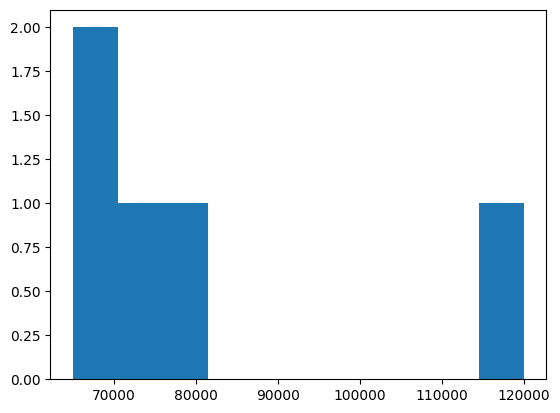

In [12]:
plt.hist(df.Salary)
# plt.xlabel("Salary")#添加X轴标签
# plt.ylabel("freq")#添加Y轴标签
# plt.title("histgram of Salary")#添加标题


<Axes: ylabel='Frequency'>

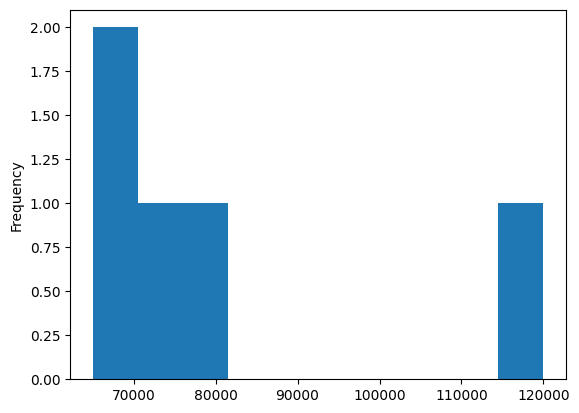

In [13]:
df["Salary"].plot.hist()

## 饼状图

In [14]:
table = df.value_counts("Department")
table

Department
Engineering    2
HR             2
Marketing      1
Name: count, dtype: int64

<Axes: ylabel='count'>

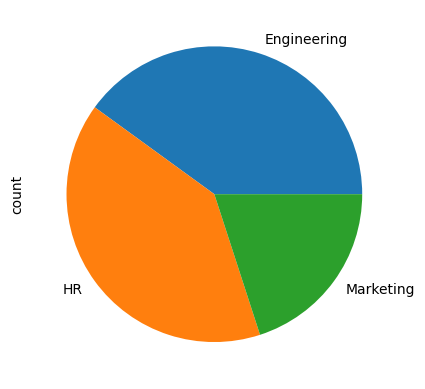

In [15]:
table.plot.pie()

## 柱形图

<Axes: xlabel='Department'>

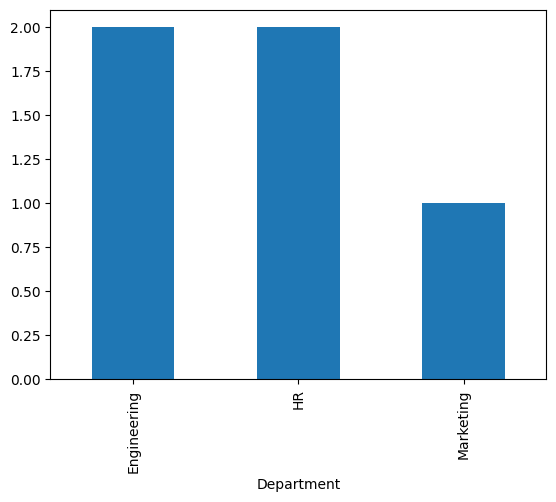

In [16]:
table.plot.bar()

## 散点图

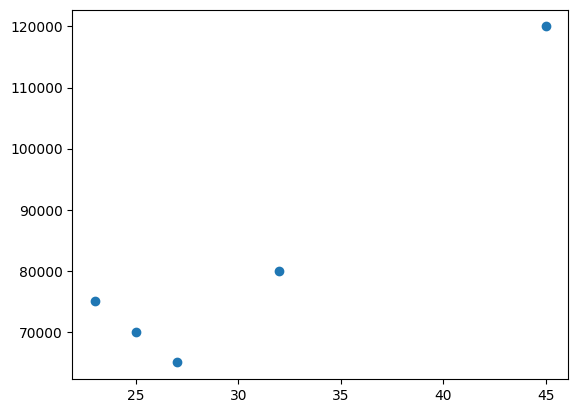

In [17]:
plt.scatter(df.Age,df.Salary)

# <strong style="color:red;">Seaborn</strong>

### 简介

**seaborn**是基于matplotlib的高级统计图表库，专注于简化复杂数据关系的可视化。主要功能包括：
- **美观的默认样式**：提供优雅的主题和调色板，自动优化图表外观。
- **统计可视化支持**：内置分布图（如`distplot`）、分类图（如`boxplot`、`violinplot`）、热力图、时间序列分析等。
- **数据聚合与可视化集成**：直接支持pandas DataFrame，可自动处理数据分组和统计。
- **高级分析功能**：轻松绘制线性回归、分布拟合、聚类结果等统计模型的可视化。

seaborn通过封装matplotlib的底层细节，使用少量代码即可生成信息丰富的统计图表，适合数据探索和结果展示。

In [18]:
import seaborn as sns

## 直方图

e:\Program Files\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Program Files\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Salary', ylabel='Count'>

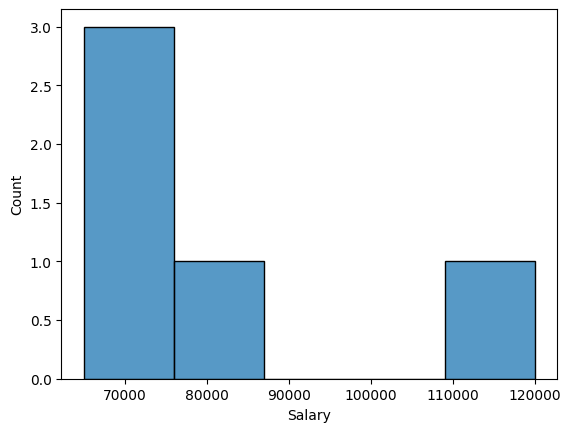

In [19]:
sns.histplot(x = "Salary", data=df,bins=5)#“bins=5”是指箱子的数量为5

## 柱形图

注意：seaborn无法画饼状图

e:\Program Files\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Program Files\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Program Files\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Department', ylabel='count'>

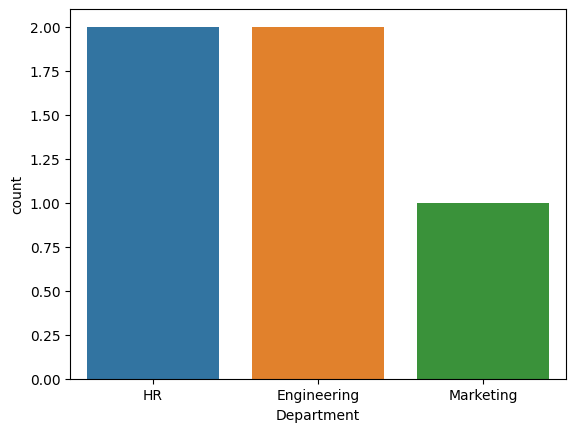

In [20]:
sns.countplot(x = "Department", data=df) #barplot

## 散点图

- `sns.scatterplot()`

e:\Program Files\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Program Files\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Age', ylabel='Salary'>

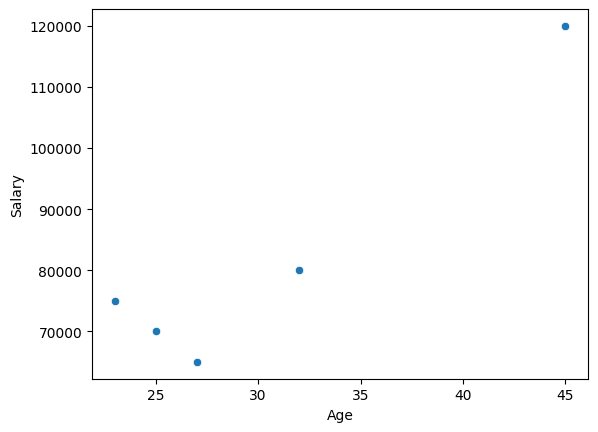

In [22]:
sns.scatterplot(x="Age", y="Salary",data=df)# 散点图